<a href="https://colab.research.google.com/github/meghananv3/Data-Analytics-Portfolio/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

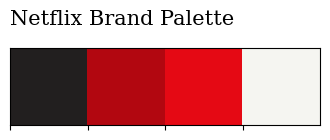

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Netflix Brand Colors
palette = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']

# Display the Palette
sns.palplot(palette)
plt.title("Netflix Brand Palette", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

In [2]:
#import data and store in the data
netflix_data = pd.read_csv("/content/Data-Analytics-Portfolio/Netflix-Content-Analysis/data/Netflix TV Shows and Movies.csv")
netflix_data

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [3]:
# Data Cleaning
netflix_data_clean = netflix_data.drop(['index', 'id', 'imdb_id'], axis=1)

In [4]:
# Check for missing values
missing_values = netflix_data_clean.isnull().sum()
missing_values

,0
title,0
type,0
description,5
release_year,0
age_certification,2285
runtime,0
imdb_score,0
imdb_votes,16


In [5]:
# Handling missing values using pandas best practices
netflix_data_clean = netflix_data_clean.assign(
    description=netflix_data_clean['description'].fillna('No Description Available'),
    age_certification=netflix_data_clean['age_certification'].fillna('Not Rated'),
    imdb_votes=netflix_data_clean['imdb_votes'].fillna(netflix_data_clean['imdb_votes'].median())
)


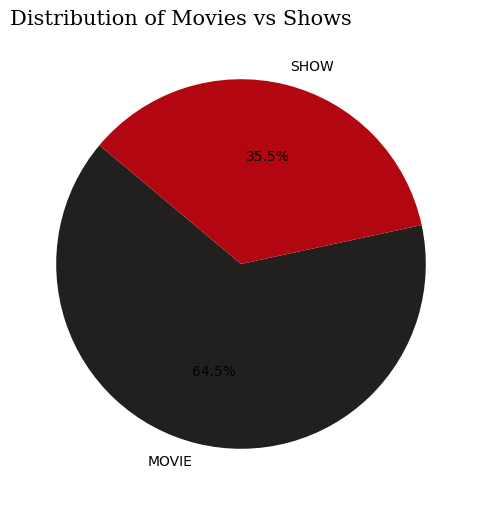

In [6]:
# 1. Distribution of Movies vs Shows
content_distribution = netflix_data_clean['type'].value_counts()
plt.figure(figsize=(6, 6))
content_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=palette[:2])
plt.title('Distribution of Movies vs Shows', loc='left', fontfamily='serif', fontsize=15)
plt.ylabel('')
plt.show()

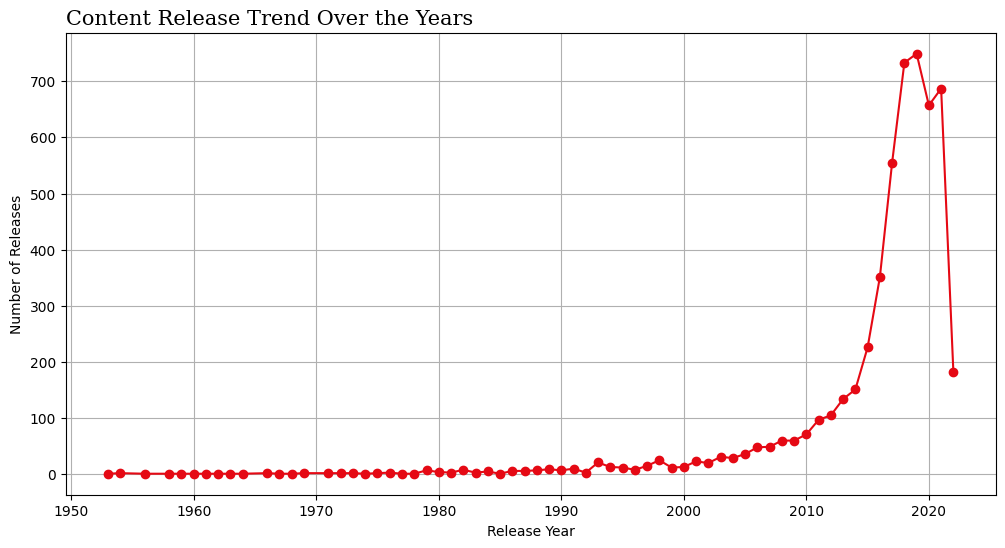

In [7]:
# 2. Content Release Trend Over the Years
release_trend = netflix_data_clean['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(release_trend.index, release_trend.values, marker='o', color=palette[2])
plt.title('Content Release Trend Over the Years', loc='left', fontfamily='serif', fontsize=15)
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

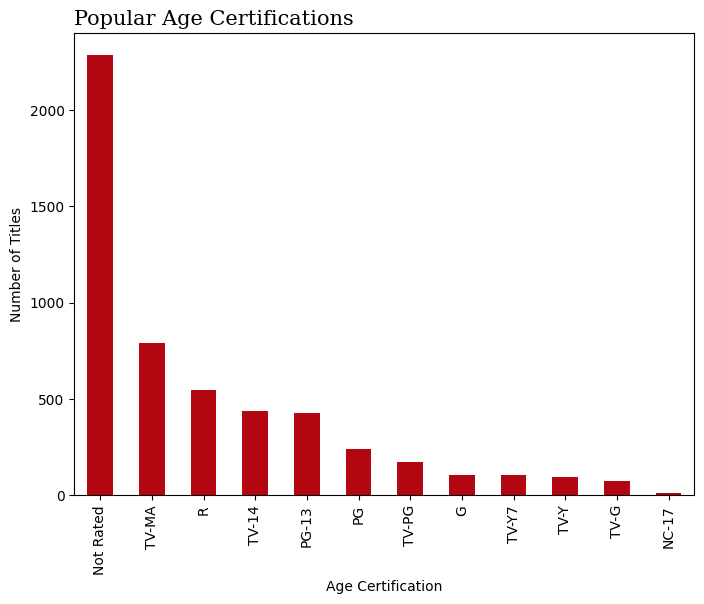

In [8]:
# 3. Popular Age Certifications
age_certification_distribution = netflix_data_clean['age_certification'].value_counts()
plt.figure(figsize=(8, 6))
age_certification_distribution.plot(kind='bar', color=palette[1])
plt.title('Popular Age Certifications', loc='left', fontfamily='serif', fontsize=15)
plt.xlabel('Age Certification')
plt.ylabel('Number of Titles')
plt.show()


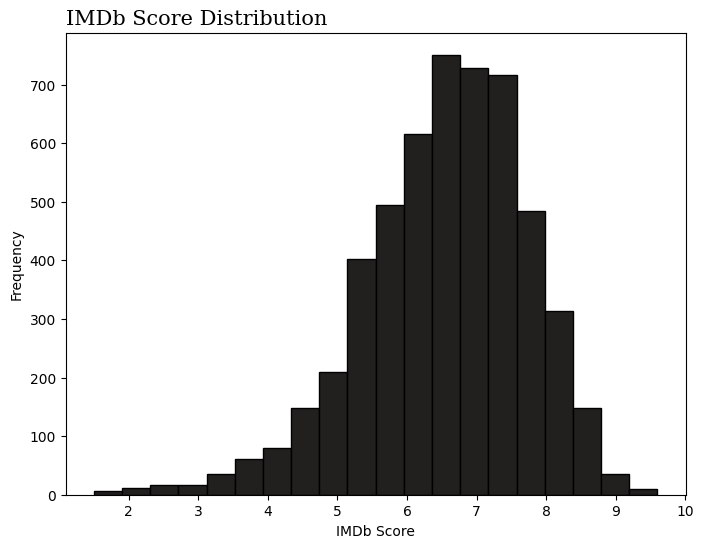

In [9]:
# 4. IMDb Score Distribution
plt.figure(figsize=(8, 6))
plt.hist(netflix_data_clean['imdb_score'], bins=20, edgecolor='black', color=palette[0])
plt.title('IMDb Score Distribution', loc='left', fontfamily='serif', fontsize=15)
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

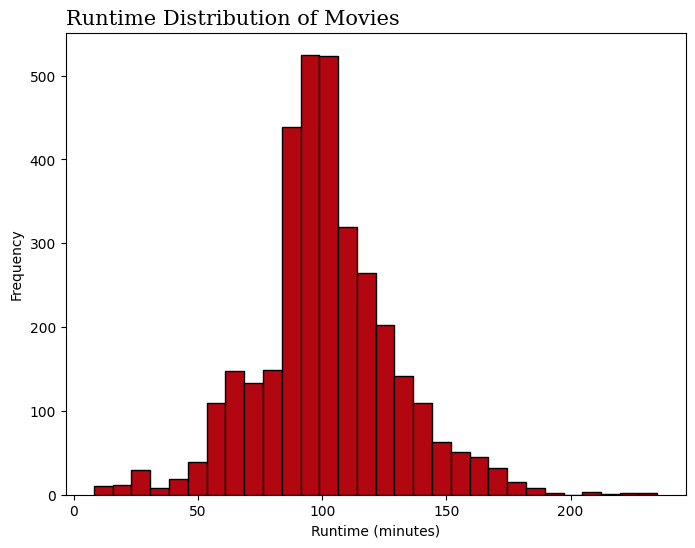

In [10]:
# 5. Runtime Analysis (Movies only)
movies_runtime = netflix_data_clean[netflix_data_clean['type'] == 'MOVIE']['runtime']
plt.figure(figsize=(8, 6))
plt.hist(movies_runtime, bins=30, edgecolor='black', color=palette[1])
plt.title('Runtime Distribution of Movies', loc='left', fontfamily='serif', fontsize=15)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Summary Statistics for IMDb Scores and Runtime
print("Summary Statistics for IMDb Scores:")
print(netflix_data_clean['imdb_score'].describe())

print("\nSummary Statistics for Runtime:")
print(netflix_data_clean['runtime'].describe())

Summary Statistics for IMDb Scores:
count    5283.000000
mean        6.533447
std         1.160932
min         1.500000
25%         5.800000
50%         6.600000
75%         7.400000
max         9.600000
Name: imdb_score, dtype: float64

Summary Statistics for Runtime:
count    5283.000000
mean       79.199886
std        38.915974
min         0.000000
25%        45.000000
50%        87.000000
75%       106.000000
max       235.000000
Name: runtime, dtype: float64


In [12]:
top_10_content = netflix_data_clean.sort_values(by='imdb_score', ascending=False).head(10)
print("\nTop 10 Movies/Shows by IMDb Score:")
print(top_10_content[['title', 'type', 'imdb_score']])


Top 10 Movies/Shows by IMDb Score:
                           title  type  imdb_score
622                     Khawatir  SHOW         9.6
2787                    #ABtalks  SHOW         9.6
229                 Breaking Bad  SHOW         9.5
3144                  Our Planet  SHOW         9.3
3597                Kota Factory  SHOW         9.3
245   Avatar: The Last Airbender  SHOW         9.3
1346                  Reply 1988  SHOW         9.2
1953                   My Mister  SHOW         9.2
4628         Who Rules The World  SHOW         9.2
3026              The Last Dance  SHOW         9.1


In [13]:
# Average Runtime by Content Type
average_runtime = netflix_data_clean.groupby('type')['runtime'].mean()
print("\nAverage Runtime by Content Type:")
print(average_runtime)


Average Runtime by Content Type:
type
MOVIE    101.537423
SHOW      38.632729
Name: runtime, dtype: float64


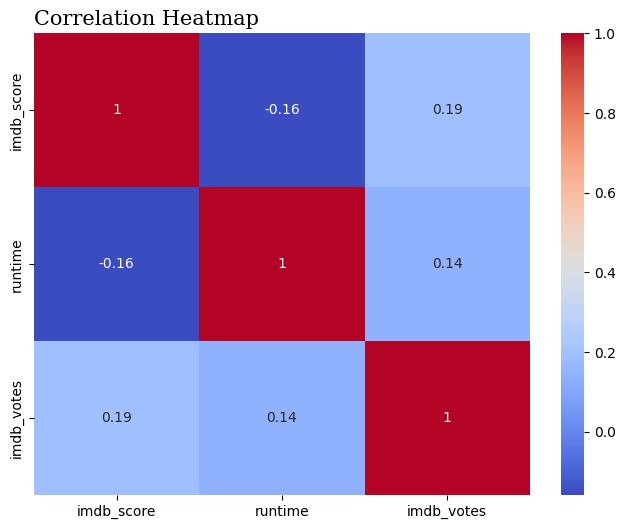

In [14]:
# 6. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = netflix_data_clean[['imdb_score', 'runtime', 'imdb_votes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', loc='left', fontfamily='serif', fontsize=15)
plt.show()

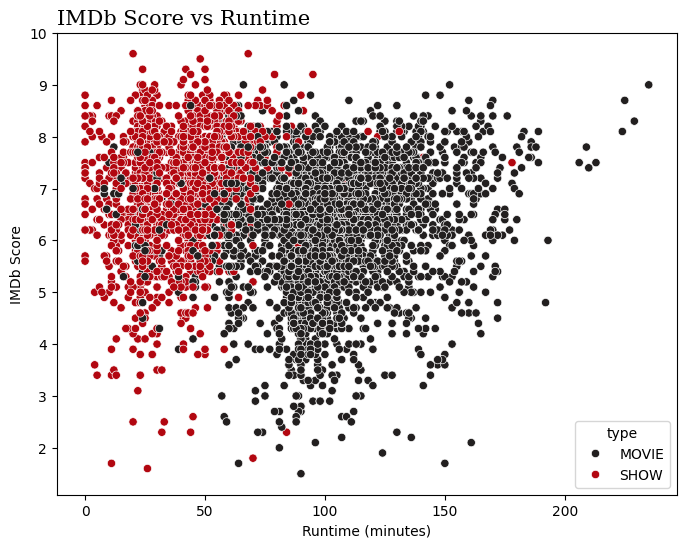

In [15]:
# 7. IMDb Score vs Runtime Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=netflix_data_clean, x='runtime', y='imdb_score', hue='type', palette=palette[:2])
plt.title('IMDb Score vs Runtime', loc='left', fontfamily='serif', fontsize=15)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

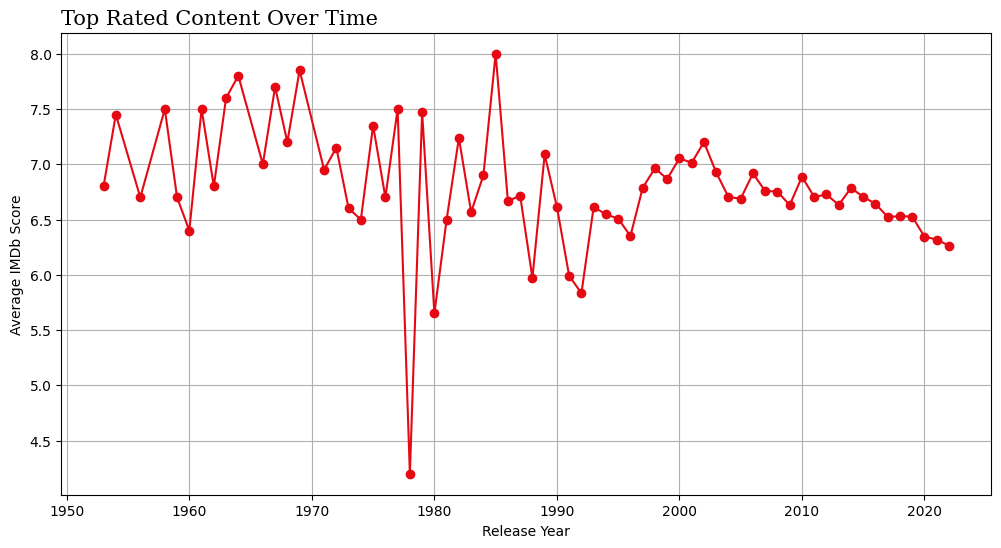

In [16]:
# 8. Top Rated Content Over Time
top_rated_over_time = netflix_data_clean.groupby('release_year')['imdb_score'].mean()
plt.figure(figsize=(12, 6))
plt.plot(top_rated_over_time.index, top_rated_over_time.values, color=palette[2], marker='o')
plt.title('Top Rated Content Over Time', loc='left', fontfamily='serif', fontsize=15)
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.show()

In [17]:
!mkdir -p Data-Analytics-Portfolio/Netflix-Content-Analysis/data

In [18]:
!touch Data-Analytics-Portfolio/Netflix-Content-Analysis/README.md